In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_colwidth', -1)  
import statistics
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline 

## State by comparisons of non-profit Organizations in the USA
Data for this capstone was taken primarily from two sources:

### [business master file](https://www.irs.gov/charities-non-profits/exempt-organizations-business-master-file-extract-eo-bmf) descriptive categorical data of tax-exempt organizations
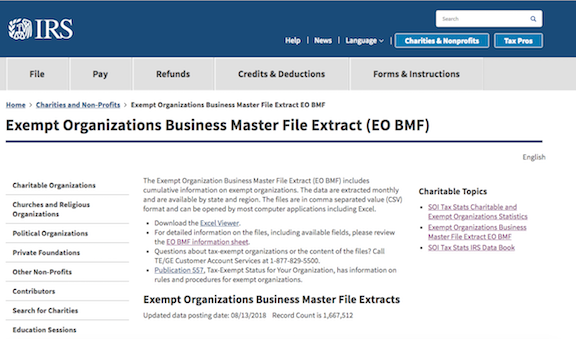

### [990s returns](https://www.irs.gov/statistics/soi-tax-stats-annual-extract-of-tax-exempt-organization-financial-data) - all tax returns filed by all tax-exempt organizations from 2012-2017
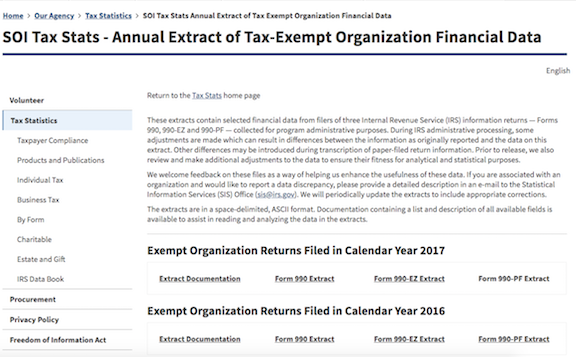

Note: Returns for private foundations are excluded as they are not classified as public charities

##  Challenges to analysis: 
The tax returns primarily finanical data, I need to merge it with a another file to make it meaningful. Much of the data cleaning involved filter for oraginations with continuous filings in a desired time frame for analysis of recent trends.

# <center> Research Questions<br> 

 ## <center>1. What states have the highest average non-profit revenue from donations (2012-2017)

 ## <center>2. What are the trends in non-profic revenue from donations and grants in the Pacific North West
    
   ###### Case Study: Oregon vs Idaho
    
 ## <center>3. What are the highest performing sectors for non-profits recieving significant funding from a governmental source?

In [2]:
df1 = pd.read_csv('/Users/markespina/Downloads/region1.csv')
df2 = pd.read_csv('/Users/markespina/Downloads/region2.csv')
df3 = pd.read_csv('/Users/markespina/Downloads/region3.csv')


In [3]:
frames = [df1,df2,df3]
df = pd.concat(frames)

In [4]:
# categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685081 entries, 0 to 801627
Data columns (total 28 columns):
EIN                 1685081 non-null int64
NAME                1685081 non-null object
ICO                 1105600 non-null object
STREET              1685078 non-null object
CITY                1685081 non-null object
STATE               1685081 non-null object
ZIP                 1685081 non-null object
GROUP               1685081 non-null int64
SUBSECTION          1685081 non-null int64
AFFILIATION         1685081 non-null int64
CLASSIFICATION      1685081 non-null int64
RULING              1685081 non-null int64
DEDUCTIBILITY       1685081 non-null int64
FOUNDATION          1685081 non-null int64
ACTIVITY            1685081 non-null int64
ORGANIZATION        1685081 non-null int64
STATUS              1685081 non-null int64
TAX_PERIOD          1339629 non-null float64
ASSET_CD            1685081 non-null int64
INCOME_CD           1685081 non-null int64
FILING_REQ_CD       

# Data wrangling

##  numerical columns of interest
totcntrbgfts = USD revenue from Direct Donations and/or Grants <br>
totrevenue = total Gross annual revenue <br>
tax_pd = Tax period, field to derive year 

### categorical columns of interest
STATE<br>
NTEE_CD (renamed 'org_type_code' for easy reference)- type of organization NTEE CODES can be searched [here](https://nccs.urban.org/sites/all/nccs-archive/html/PubApps/nteeSearch.php?gQry=allMajor&codeType=NTEE)<br>
nonpfrea - reason for non-profit status **has code to flag substantial government funding status**

In [5]:
#read 990 & 990EZ tax returns for 2012 -2017
data_17=pd.read_table('/Users/markespina/Downloads/17eofinextract990.dat', sep=' ' )

data_17_ez=pd.read_table('/Users/markespina/Downloads/17eofinextract990ez.dat', sep=' ' )

data_16=pd.read_table('/Users/markespina/Downloads/16eofinextract990.dat', sep=' ' )

data_16_ez=pd.read_table('/Users/markespina/Downloads/16eofinextract990ez.dat', sep=' ' )

data_15=pd.read_table('/Users/markespina/Downloads/15eofinextract990.dat', sep=' ' )

data_15_ez=pd.read_table('/Users/markespina/Downloads/15eofinextract990ez.dat', sep=' ' )

data_14=pd.read_table('/Users/markespina/Downloads/14eofinextract990.dat', sep=' ' )

data_14_ez=pd.read_table('/Users/markespina/Downloads/14eofinextract990ez.dat', sep=' ' )

data_13=pd.read_table('/Users/markespina/Downloads/13eofinextract990.dat', sep=' ' )

data_13_ez=pd.read_table('/Users/markespina/Downloads/13eofinextract990ez.dat', sep=' ' )

data_12=pd.read_table('/Users/markespina/Downloads/12eofinextract990.dat', sep=' ' )

data_12_ez=pd.read_table('/Users/markespina/Downloads/12eofinextract990ez.dat', sep=' ' )

In [6]:
#filter columns for analysis
fin_17=data_17[['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']]
fin_17_ez=data_17_ez[['EIN','taxpd','totcntrbs','totrevnue','nonpfrea']]


fin_16=data_16[['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']]
fin_16_ez=data_16_ez[['EIN','tax_pd','totcntrbs','totrevnue','nonpfrea']]

fin_15=data_15[['EIN','tax_prd','totcntrbgfts','totrevenue','nonpfrea']]
fin_15_ez=data_15_ez[['EIN','a_tax_prd','totcntrbs','totrevnue','nonpfrea']]

fin_14=data_14[['EIN','tax_prd','totcntrbgfts','totrevenue','nonpfrea']]
fin_14_ez=data_14_ez[['EIN','taxprd','totcntrbs','totrevnue','nonpfrea']]

fin_13=data_13[['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']]
fin_13_ez=data_13_ez[['EIN','tax_pd','totcntrbs','totrevnue','nonpfrea']]

fin_12=data_12[['EIN','tax_prd','totcntrbgfts','totrevenue','nonpfrea']]
fin_12_ez=data_12_ez[['ein','tax_prd','totcntrbs','totrevnue','nonpfrea']]

In [7]:
"""Field names are inconsistient, varying year to year,
   relabel data for clean merge"""

fin_17.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_17_ez.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_16.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_16_ez.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_15.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_15_ez.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_14.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_14_ez.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_13.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_13_ez.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_12.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']
fin_12_ez.columns=['EIN','tax_pd','totcntrbgfts','totrevenue','nonpfrea']

In [8]:
# merge tax data from 2012 -2017
fin_data=[fin_12, fin_12_ez, fin_13, fin_13_ez, fin_14, fin_14_ez, \
          fin_15, fin_15_ez, fin_16, fin_16_ez, fin_17, fin_17_ez]
fin_12_17=pd.concat(fin_data)

In [9]:
fin_12_17.head()

,EIN,tax_pd,totcntrbgfts,totrevenue,nonpfrea
0,331151592,201106,382481,384423,0
1,850403577,201106,232438,233545,0
2,412200005,201106,351941,351941,0
3,381581795,201012,91937,251602,0
4,546052431,201012,239981,264264,0


In [10]:
#merge financial and categorical data
new_df= pd.merge(fin_12_17, df, on='EIN', how='left')

In [11]:
new_df.columns

Index(['EIN', 'tax_pd', 'totcntrbgfts', 'totrevenue', 'nonpfrea', 'NAME', 'ICO', 'STREET', 'CITY', 'STATE', 'ZIP', 'GROUP', 'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION', 'RULING', 'DEDUCTIBILITY', 'FOUNDATION', 'ACTIVITY', 'ORGANIZATION', 'STATUS', 'TAX_PERIOD', 'ASSET_CD', 'INCOME_CD', 'FILING_REQ_CD', 'PF_FILING_REQ_CD', 'ACCT_PD', 'ASSET_AMT', 'INCOME_AMT', 'REVENUE_AMT', 'NTEE_CD', 'SORT_NAME'], dtype='object')

In [12]:
#make column labels more human readable, NTEE_CD
col_headers= ['EIN', 'tax_pd', 'rev_contributions',
       'rev_total','nonpfrea', 'NAME', 'ICO', 'STREET', 'CITY', 'STATE', 'ZIP', 'GROUP',
       'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION', 'RULING',
       'DEDUCTIBILITY', 'FOUNDATION', 'ACTIVITY', 'ORGANIZATION', 'STATUS',
       'TAX_PERIOD', 'ASSET_CD', 'INCOME_CD', 'FILING_REQ_CD',
       'PF_FILING_REQ_CD', 'ACCT_PD', 'ASSET_AMT', 'INCOME_AMT', 'REVENUE_AMT',
       'NTEE_CD', 'SORT_NAME']
#convert all labels to lowercase
new_headers=[]
for header in col_headers:
    new_headers.append(
        str(header).lower())


new_df.columns=new_headers

In [13]:
new_df.head()

,ein,tax_pd,rev_contributions,rev_total,nonpfrea,name,ico,street,city,state,zip,group,subsection,affiliation,classification,ruling,deductibility,foundation,activity,organization,status,tax_period,asset_cd,income_cd,filing_req_cd,pf_filing_req_cd,acct_pd,asset_amt,income_amt,revenue_amt,ntee_cd,sort_name
0,331151592,201106,382481,384423,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,850403577,201106,232438,233545,0,NEW MEXICO PUBLIC INTEREST RESEARCH GROUP FUND,NaN,PO BOX 40173,ALBUQUERQUE,NM,87196-0173,0.0,4.0,3.0,1000.0,199310.0,2.0,0.0,351000000.0,1.0,1.0,201606.0,5.0,4.0,1.0,0.0,6.0,540179.0,215554.0,215554.0,NaN,NMPIRG
2,412200005,201106,351941,351941,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,381581795,201012,91937,251602,0,CHARLEVOIX CHAMBER OF COMMERCE INC,NaN,109 MASON ST,CHARLEVOIX,MI,49720-1313,0.0,6.0,3.0,1000.0,199208.0,0.0,0.0,0.0,1.0,1.0,201612.0,4.0,4.0,1.0,0.0,12.0,112780.0,216733.0,216733.0,NaN,NaN
4,546052431,201012,239981,264264,0,MEHERRIN VOLUNTEER FIRE & RESCUE INC ENGINE CO NO 5,NaN,102 MORRES ORDINARY ROAD,MEHERRIN,VA,23954-0000,0.0,4.0,3.0,1000.0,195804.0,1.0,0.0,407000000.0,5.0,1.0,201512.0,5.0,4.0,1.0,0.0,12.0,695499.0,472275.0,238146.0,NaN,NaN


In [14]:
# Tax period field 'tax_pd' in 'YYYYMM' format, grab 1st 4 digits for tax_year field
new_df['tax_year']= new_df.tax_pd.apply(lambda x: int(str(x)[:4]))
new_df[['ein','tax_pd','tax_year']].head()

,ein,tax_pd,tax_year
0,331151592,201106,2011
1,850403577,201106,2011
2,412200005,201106,2011
3,381581795,201012,2010
4,546052431,201012,2010


In [15]:
#Only want to look at recent trends in data
recent_data=new_df.tax_year.isin([2012,2013,2014,2015,2016,2017])

#track count of times organizations has filed between 2012 and 2017  
counts=new_df[recent_data].ein.value_counts().reset_index(name='count')

#restrict data to orgs that have filed all 6 six years for continuous data sample
limit=counts['count']==6
counts[limit].head()

,index,count
723,113129144,6
724,202508087,6
725,750304873,6
726,383128631,6
727,205326682,6


In [16]:
#rename columns for easy ref to EIN - Employer ID
counts.columns=['ein', 'counts']

#filter organizations that filed 6 times between 2012 & 2017
new_df = new_df[(new_df.ein.isin(list(counts[limit]['ein'])))&(recent_data==True)]
new_df.head()

,ein,tax_pd,rev_contributions,rev_total,nonpfrea,name,ico,street,city,state,zip,group,subsection,affiliation,classification,ruling,deductibility,foundation,activity,organization,status,tax_period,asset_cd,income_cd,filing_req_cd,pf_filing_req_cd,acct_pd,asset_amt,income_amt,revenue_amt,ntee_cd,sort_name,tax_year
5461,610592289,201206,0,0,0,GENERAL GRAND CHAPTER OF THE ROYAL ARCH MASONS INTERNATIONAL,NaN,PO BOX 128,GREENFIELD,IN,46140-0128,0.0,8.0,1.0,1000.0,195008.0,0.0,0.0,0.0,1.0,1.0,201706.0,6.0,5.0,1.0,0.0,6.0,1316880.0,764360.0,263994.0,NaN,ROYAL ARCH MASONS INTERNATL,2012
7873,820499773,201201,0,128150,0,CASSIA COUNTY BEET GROWERS ASSOCIATION,% BOB BECK,1978 S 2350 E,MALTA,ID,83342-8645,0.0,5.0,3.0,1000.0,199902.0,2.0,0.0,0.0,1.0,1.0,201801.0,4.0,4.0,1.0,0.0,1.0,287987.0,487274.0,487274.0,K20,NaN,2012
8412,436064388,201203,0,16434,0,FAIRVIEW CEMETERY TRUST FUND,NaN,24655 E 340TH ST,BETHANY,MO,64424-9313,0.0,13.0,3.0,1000.0,199003.0,1.0,0.0,901900000.0,2.0,1.0,201803.0,4.0,3.0,2.0,0.0,3.0,376891.0,27019.0,24701.0,NaN,THOMAS LEWIS D TTEE,2012
9186,360924540,201202,29301,55914,0,BEDFORD PARK-CLEARING INDUSTRIAL ASSOCIATION,NaN,5101 W 67TH ST,BEDFORD PARK,IL,60638-6421,0.0,6.0,3.0,2000.0,194406.0,2.0,0.0,279000000.0,1.0,1.0,201802.0,3.0,3.0,1.0,0.0,2.0,29482.0,85635.0,53500.0,NaN,NaN,2012
9398,60802187,201202,15842,15842,0,BOULDER RIDGE INCORPORATED,% SANDRA SMITH,121 LEEUWARDEN RD,DARIEN,CT,06820-3028,0.0,7.0,3.0,1000.0,197603.0,2.0,0.0,297354355.0,1.0,1.0,201802.0,4.0,2.0,2.0,0.0,2.0,178510.0,15938.0,15938.0,NaN,NaN,2012


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422064 entries, 5461 to 3135216
Data columns (total 33 columns):
ein                  422064 non-null int64
tax_pd               422064 non-null int64
rev_contributions    422064 non-null int64
rev_total            422064 non-null int64
nonpfrea             422064 non-null int64
name                 420432 non-null object
ico                  190716 non-null object
street               420432 non-null object
city                 420432 non-null object
state                420432 non-null object
zip                  420432 non-null object
group                420432 non-null float64
subsection           420432 non-null float64
affiliation          420432 non-null float64
classification       420432 non-null float64
ruling               420432 non-null float64
deductibility        420432 non-null float64
foundation           420432 non-null float64
activity             420432 non-null float64
organization         420432 non-null float64
s

In [18]:
#clean data for orginations filing 'short tax years, less than 12 months
new_df=new_df.drop_duplicates(subset=['ein', 'tax_year'])

#find all EINs with less than 6 filings 
print(new_df.ein.value_counts().tail(4440).head(10))

#EINs with less than 6 filings in list
outliers = list(new_df.ein.value_counts().tail(4439).reset_index()['index'])

50523622     6
133717570    5
581791724    5
942207457    5
202031718    5
382756425    5
560586172    5
660321594    5
210639858    5
246025992    5
Name: ein, dtype: int64


In [19]:
#clean data of outliers
cleaner=new_df.ein.isin(outliers)==False
final_df=new_df[cleaner]

#check data for 100% continuity per year
final_df.tax_year.value_counts()

2017    65905
2016    65905
2015    65905
2014    65905
2013    65905
2012    65905
Name: tax_year, dtype: int64

In [20]:
#filter Data for columns of interest
final_df = final_df[['ein','name', 'ntee_cd', 'tax_year','rev_contributions', 'rev_total', 'nonpfrea','state', 'city']]
final_df.head()

,ein,name,ntee_cd,tax_year,rev_contributions,rev_total,nonpfrea,state,city
5461,610592289,GENERAL GRAND CHAPTER OF THE ROYAL ARCH MASONS INTERNATIONAL,NaN,2012,0,0,0,IN,GREENFIELD
7873,820499773,CASSIA COUNTY BEET GROWERS ASSOCIATION,K20,2012,0,128150,0,ID,MALTA
8412,436064388,FAIRVIEW CEMETERY TRUST FUND,NaN,2012,0,16434,0,MO,BETHANY
9186,360924540,BEDFORD PARK-CLEARING INDUSTRIAL ASSOCIATION,NaN,2012,29301,55914,0,IL,BEDFORD PARK
9398,60802187,BOULDER RIDGE INCORPORATED,NaN,2012,15842,15842,0,CT,DARIEN


In [21]:
len(final_df)

395430

## what states' non-profits have the highest average revenue from charitable contributions from 2012-2017?

In [22]:
final_df.groupby(['state']).rev_contributions.describe().sort_values('mean', ascending=False).head()


,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
DC,1608.0,7.105622e+06,5.218507e+07,0.0,1615.75,125692.0,886615.00,1.133413e+09
NC,14004.0,2.727044e+06,2.604586e+08,0.0,2552.50,48361.0,250113.50,3.082145e+10
CO,6864.0,1.592033e+06,2.241083e+07,-2113.0,1601.00,34645.0,204013.25,8.195233e+08
CT,8064.0,1.093046e+06,3.155241e+07,0.0,558.50,23328.0,159373.00,2.379130e+09
GA,8004.0,9.779369e+05,1.537751e+07,0.0,89.75,22395.5,146354.00,6.014549e+08


## Observations
DC's average non-profit revenue from charitable contributions is more than double the next highest state.

In [23]:
# convert y scale to millions
def millions(x, pos):
    return '$%1.fM' % (x/1000000)
#The two args are the value and tick position'
formatter = FuncFormatter(millions)

Text(0,0.5,'Revenue from charitable contributions')

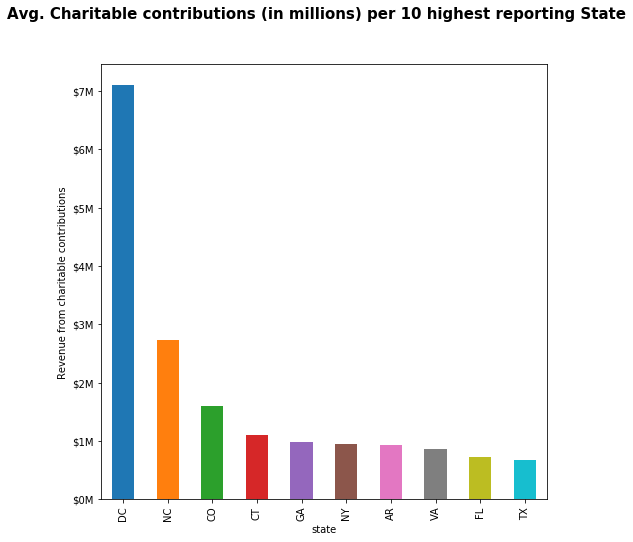

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax.yaxis.set_major_formatter(formatter)
plt.suptitle('Avg. Charitable contributions (in millions) per 10 highest reporting State',\
             fontsize=15, fontweight='bold')
final_df.groupby('state').rev_contributions.mean().sort_values(ascending=False)[:10].plot(kind='bar', ax=ax)
plt.ylabel('Revenue from charitable contributions')


## comparing charitable contributions revenue 


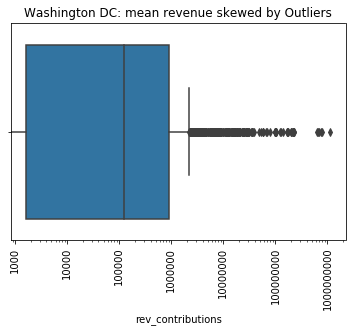

In [25]:
f, ax=plt.subplots()
sns.boxplot(final_df[final_df.state=='DC'].rev_contributions, ax=ax)
plt.xscale('log')
plt.title('Washington DC: mean revenue skewed by Outliers')
# turn off scientific notation
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.xticks(rotation=90)
ax.xaxis.set_major_formatter(formatter)

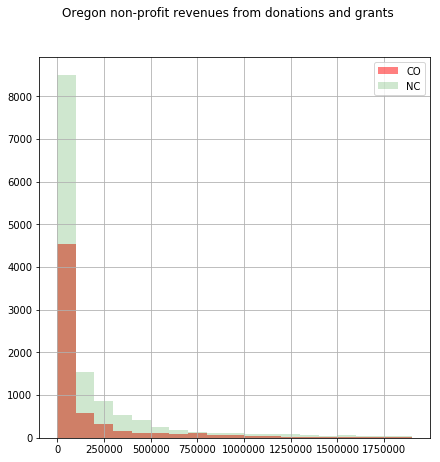

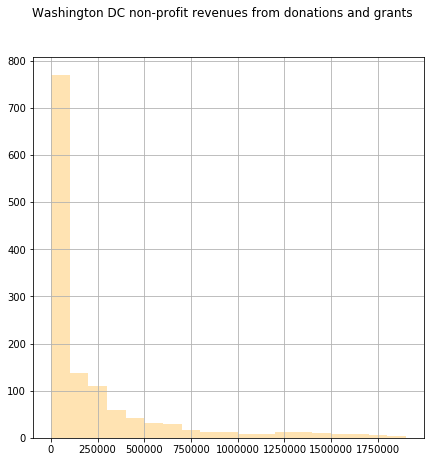

In [26]:
f, ax = plt.subplots(figsize=(7,7))
plt.suptitle('Oregon non-profit revenues from donations and grants')
final_df[final_df.state=='CO'].rev_contributions.hist(
    bins=[x for x in range(0, 2000000, 100000)],alpha=.5,  color = 'red')
final_df[final_df.state=='NC'].rev_contributions.hist(
    bins=[x for x in range(0, 2000000, 100000)], alpha=.19, color = 'green')
plt.legend(labels=['CO', 'NC'])
f, ax = plt.subplots(figsize=(7,7))
plt.suptitle('Washington DC non-profit revenues from donations and grants')
final_df[final_df.state=='DC'].rev_contributions.hist(
    bins=[x for x in range(0, 2000000, 100000)], alpha=.3, color = 'orange')






## Finding: Non-profits in DC have highest average revenue from direct donations and grants, 
## however, in many states the majority report revenues under 100,000 USD, with a small of larger multimillion dollar revenues  skewing the mean higher

## Trends in non-profit charitable contribution revenue 2012-2017: 

Text(0.5,1,'Idaho')

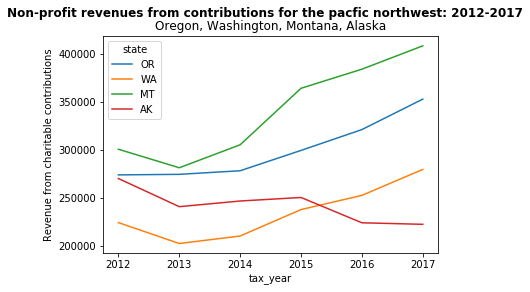

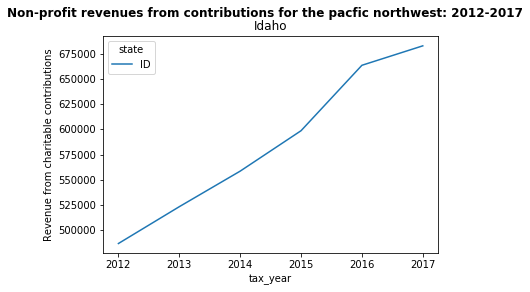

In [27]:
fig, ax = plt.subplots()
final_df[final_df.state=='OR'].groupby(['state','tax_year']).rev_contributions.mean().unstack('state').plot(ax=ax)
plt.ylabel('Revenue from charitable contributions')
plt.title('Oregon, Washington, Montana, Alaska')
plt.suptitle('Non-profit revenues from contributions for the pacfic northwest: 2012-2017', fontweight='bold')
plt.legend(loc='best')
final_df[final_df.state=='WA'].groupby(['state','tax_year']).rev_contributions.mean().unstack('state').plot(ax=ax)
#final_df[final_df.state=='ID'].groupby(['state','tax_year']).rev_contributions.mean().unstack('state').plot(ax=ax)
final_df[final_df.state=='MT'].groupby(['state','tax_year']).rev_contributions.mean().unstack('state').plot(ax=ax)
final_df[final_df.state=='AK'].groupby(['state','tax_year']).rev_contributions.mean().unstack('state').plot(ax=ax)

fig, ax = plt.subplots()
final_df[final_df.state=='ID'].groupby(['state','tax_year']).rev_contributions.mean().unstack('state').plot(ax=ax)
plt.ylabel('Revenue from charitable contributions')
plt.suptitle('Non-profit revenues from contributions for the pacfic northwest: 2012-2017', fontweight='bold')
plt.title('Idaho')

## All states in the PNW except Alaska have experienced a increase in revenue since 2013
## Idaho's non-profits  have the highest average revenue across the 5 states by a margin of over 200,000 USD
## Similar to DC, this could be due to it's smaller population size and outlying multimillion dollar donations 
## 

In [28]:
pop1=final_df[(final_df.state=='OR')&(final_df.rev_contributions>0)].rev_contributions
pop2=final_df[(final_df.state=='ID')&(final_df.rev_contributions>0)].rev_contributions

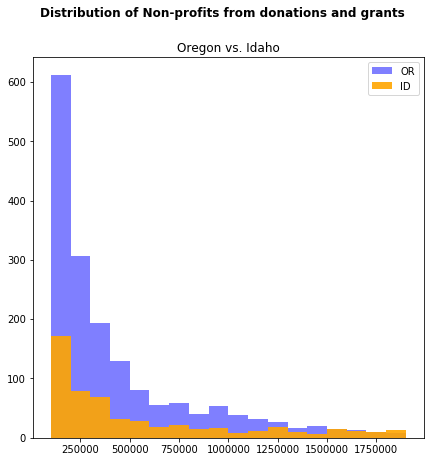

In [29]:
plt.figure(figsize=(7,7))
plt.suptitle('Distribution of Non-profits from donations and grants', fontweight='bold')
plt.title('Oregon vs. Idaho')
plt.hist(pop1,bins=[x for x in range(100000, 2000000, 100000)], alpha=.5, color='blue', label='OR')
plt.hist(pop2,bins=[x for x in range(100000, 2000000, 100000)], alpha=.9, color='orange', label='ID')
plt.legend(loc='upper right')


**Distribution is log normal**

In [30]:
# normalize distribution via boxcox log transform
pop1 = boxcox(pop1, 0)
pop2 = boxcox(pop2, 0)

In [31]:
len(pop1)

5398

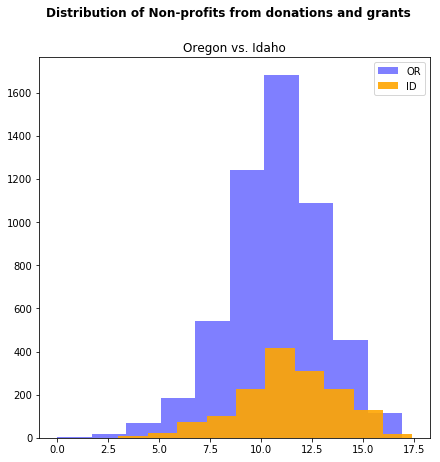

In [32]:
plt.figure(figsize=(7,7))
plt.suptitle('Distribution of Non-profits from donations and grants', fontweight='bold')
plt.title('Oregon vs. Idaho')
plt.hist(pop1, alpha=.5, color='blue', label='OR')
plt.hist(pop2, alpha=.9, color='orange', label='ID')

plt.legend(loc='upper right')

In [33]:
avg1 = pop1.mean()
avg2 = pop2.mean()
diff= avg2-avg1

sizes = np.array([len(pop2), len(pop1)])
stds = np.array([pop2.std(), pop1.std()])
combined_se= np.sqrt(sum(stds**2/sizes))
print('Difference in populationMeans:', diff)
#diff/combined_se

Difference in populationMeans: 0.6412041958893901


In [34]:
ttest_ind(pop2,pop1, equal_var=False)


Ttest_indResult(statistic=9.308251084470959, pvalue=2.83435443636889e-20)

## Oregon vs. Idaho: Trends in Non-profits recieving government funds
### What is the highest funded non-profit sector in each state

To answer this question I grouped organizations based on the  [National Taxonomy of Exempt Entities Major group codes](https://nccs.urban.org/sites/all/nccs-archive/html/PubApps/nteeSearch.php?gQry=allMajor&codeType=NTEE) <br> This presented challenges as the **'ntee_cd'** field contained roughly 45% null values in the full dataset, to address this I restricted the data to organizations that recieved a [siginficant] portion of revenue from government funds.

<br> In this restricted sample the **'ntee_cd'** is only 23.4% null values. Furthermore I put the remaining the null values in their own sector 'Missing/Not provided'.  

In [35]:
final_df[final_df.ntee_cd.notnull()].head() # the first char of the 'ntee_cd' field denotes the group the organization belongs to


,ein,name,ntee_cd,tax_year,rev_contributions,rev_total,nonpfrea,state,city
7873,820499773,CASSIA COUNTY BEET GROWERS ASSOCIATION,K20,2012,0,128150,0,ID,MALTA
9841,237428058,HEMMI ROAD WATER ASSOCIATION INC,Y22,2012,0,104976,0,WA,EVERSON
10555,721023253,JUGS SOCIAL CLUB INC KREWE OF NOMTOC,N50,2012,166014,200959,0,LA,NEW ORLEANS
14145,201052727,ST LOUIS FIRE FIGTERS BUILDING CORPORATION,S47,2012,32616,72940,0,MO,SAINT LOUIS
15439,66048993,LAWN CEMETERY ASSOCIATION,Y50,2012,0,46151,0,CT,SHELTON


In [36]:
#load csv ntee group codes list,
code_map= pd.read_csv('/Users/markespina/Downloads/ntee.csv')

code_map

,code,desc
0,A,"Arts, Culture & Humanities"
1,B,Education
2,C,Environment
3,D,Animal-Related
4,E,Health Care
5,F,Mental Health & Crisis Intervention
6,G,Voluntary Health Associations & Medical Disciplines
7,H,Medical Research
8,I,Crime & Legal-Related
9,J,Employment


In [37]:
#create dictionary from 'code' and 'desc' columns
sector_code= list(code_map['code'])
category=list(code_map['desc'])

decoder=dict(list(zip(sector_code,category)))
# Adjust broad categories names for clarity
decoder['Z']='Missing/Not provided'
decoder['E']='General Health Care'
decoder['G']='Specialized/disease-specific Health Care'
decoder['Q']='International Aid '
decoder

{'A': 'Arts, Culture & Humanities',
 'B': 'Education',
 'C': 'Environment',
 'D': 'Animal-Related',
 'E': 'General Health Care',
 'F': 'Mental Health & Crisis Intervention',
 'G': 'Specialized/disease-specific Health Care',
 'H': 'Medical Research',
 'I': 'Crime & Legal-Related',
 'J': 'Employment',
 'K': 'Food, Agriculture & Nutrition',
 'L': 'Housing & Shelter',
 'M': 'Public Safety, Disaster Preparedness & Relief',
 'N': 'Recreation & Sports',
 'O': 'Youth Development',
 'P': 'Human Services',
 'Q': 'International Aid ',
 'R': 'Civil Rights, Social Action & Advocacy',
 'S': 'Community Improvement & Capacity Building',
 'T': 'Philanthropy, Voluntarism & Grantmaking Foundations',
 'U': 'Science & Technology',
 'V': 'Social Science',
 'W': 'Public & Societal Benefit',
 'X': 'Religion-Related',
 'Y': 'Mutual & Membership Benefit',
 'Z': 'Missing/Not provided'}

In [38]:
# set null values in ntee_cd to group code for 'Missing'
final_df.ntee_cd=final_df.ntee_cd.fillna('Z')

#rename ntee_cd to human readable label use future reference 
final_df.columns=['ein', 'name', 'org_type_code', 'tax_year', 'rev_contributions', 'rev_total', 'nonpfrea', 'state', 'city']


In [39]:
final_df.head()

,ein,name,org_type_code,tax_year,rev_contributions,rev_total,nonpfrea,state,city
5461,610592289,GENERAL GRAND CHAPTER OF THE ROYAL ARCH MASONS INTERNATIONAL,Z,2012,0,0,0,IN,GREENFIELD
7873,820499773,CASSIA COUNTY BEET GROWERS ASSOCIATION,K20,2012,0,128150,0,ID,MALTA
8412,436064388,FAIRVIEW CEMETERY TRUST FUND,Z,2012,0,16434,0,MO,BETHANY
9186,360924540,BEDFORD PARK-CLEARING INDUSTRIAL ASSOCIATION,Z,2012,29301,55914,0,IL,BEDFORD PARK
9398,60802187,BOULDER RIDGE INCORPORATED,Z,2012,15842,15842,0,CT,DARIEN


In [40]:
# fucton to convert NTEE group codes to corresponding human readable categories
def decode(df, decoder_dict):
    decoded_categories=[]
    for i, row in df.iterrows():
        for pair in decoder_dict.items():
            if row['code']==pair[0]:
                decoded_categories.append(pair[1])
    return decoded_categories

In [41]:
#check nulls in org_type field in final_df
format((len(final_df[final_df.org_type_code.str.startswith('Z')])/len(final_df))*100, '.2f')+'% null/missing'


'46.03% null/missing'

In [42]:
ref=pd.read_csv('/Users/markespina/Downloads/data_cheat_sheet.csv')
ref.columns=['Codes for reason for exempt status', 'Despription']
ref_nonpfrea=ref[12:20].T
ref_nonpfrea

,12,13,14,15,16,17,18,19
Codes for reason for exempt status,00,01,02,03,04,05,06,07
Despription,Not reported,Church,School (described in 170(b)1)(A)(i)),Hospital organization (described in 170(b)1)(A)(i)),"Federal, state, or local government unit (described in 170(b)1)(A)(i))",Medical research organization (described in 170(b)1)(A)(i)),Organization operated for the benefit of a public college or university (described in 170(b)1)(A)(i)),Organization that receives a substantial part of its support from government (described in 170(b)1)(A)(i))


In [43]:
# split data into majority government funded entities and non-majority government funded entities
no_gov_funds_df=final_df[final_df.nonpfrea!=7]
gov_funds_df=final_df[final_df.nonpfrea==7]

 **The IRS threshold for an organization recieving signicant government funds is a minimum of 10% of total revenue**<br> more can be read about this requirement [here](https://www.law.cornell.edu/cfr/text/26/1.170A-9) under the section entitled 'Ten-percent support limitation'.

In [44]:
#check nulls in org_type field in gov_funds_df

format((len(gov_funds_df[gov_funds_df.org_type_code.str.startswith('Z')])/len(gov_funds_df))*100, '.2f')+'% null/missing'

'23.42% null/missing'

In [45]:
gov_funds_df.ein.value_counts().tail(2379)
outliers = list(gov_funds_df.ein.value_counts().tail(2378).reset_index()['index'])

In [46]:
cleaner=gov_funds_df.ein.isin(outliers)==False
gov_funds_df=gov_funds_df[cleaner]

#check data for 100% continuity per year
gov_funds_df.tax_year.value_counts()


2017    15083
2016    15083
2015    15083
2014    15083
2013    15083
2012    15083
Name: tax_year, dtype: int64

In [47]:
# create year over year pivot of avg donation revenue for Oregon
or_df=gov_funds_df[gov_funds_df.state=='OR'].groupby(['tax_year','org_type_code']).rev_contributions.mean().unstack().T.reset_index()
or_df.columns= ['org_type_code', '2012', '2013', '2014', '2015', '2016', '2017']

# adjusted columns labels to str to perform column value arithmetic
years=[or_df['2012'],or_df['2013'],or_df['2014'],or_df['2015'],or_df['2016'],or_df['2017']]


or_df['avg']= sum(years)/len(years)

# Top 15 highest donation revenues
highest_avg=or_df.sort_values('avg', ascending=False)


#set data to plot to variable
highest_avg['code']= highest_avg.org_type_code.apply(lambda x: str(x)[0])
highest_avg['code']=decode(highest_avg,decoder)
highest_funded_areas_or=highest_avg.groupby('code').avg.sum().sort_values(ascending=False).reset_index()

highest_funded_areas_or



,code,avg
0,Human Services,3.176744e+07
1,Animal-Related,9.781184e+06
2,Specialized/disease-specific Health Care,9.304268e+06
3,"Arts, Culture & Humanities",8.859820e+06
4,Mental Health & Crisis Intervention,8.179385e+06
5,Employment,7.411069e+06
6,Housing & Shelter,6.810449e+06
7,Youth Development,5.763539e+06
8,Community Improvement & Capacity Building,5.208457e+06
9,Education,5.076209e+06


In [48]:
# create year over year pivot of avg donation revenue for Idaho 
id_df=gov_funds_df[gov_funds_df.state=='ID'].groupby(['tax_year','org_type_code']).rev_contributions.mean().unstack().T.reset_index()
id_df.columns= ['org_type_code', '2012', '2013', '2014', '2015', '2016', '2017']

# adjusted columns labels to str to perform column value arithmetic
years=[id_df['2012'],id_df['2013'],id_df['2014'],id_df['2015'],id_df['2016'],id_df['2017']]


id_df['avg']= sum(years)/len(years)

# Top 15 highest donation revenues
highest_avg=id_df.sort_values('avg', ascending=False)


#set data to plot to variable
highest_avg['code']= highest_avg.org_type_code.apply(lambda x: str(x)[0])
highest_avg['code']=decode(highest_avg,decoder)
highest_funded_areas_id=highest_avg.groupby('code').avg.sum().sort_values(ascending=False).reset_index()

highest_funded_areas_id

,code,avg
0,"Food, Agriculture & Nutrition",2.946381e+07
1,General Health Care,1.932008e+07
2,"Philanthropy, Voluntarism & Grantmaking Foundations",4.584989e+06
3,Education,3.078076e+06
4,Human Services,1.980387e+06
5,"Arts, Culture & Humanities",1.643020e+06
6,Crime & Legal-Related,1.234590e+06
7,Recreation & Sports,1.090613e+06
8,Public & Societal Benefit,9.889887e+05
9,Environment,5.781953e+05


Text(0,0.5,'Revenue from charitable contributions')

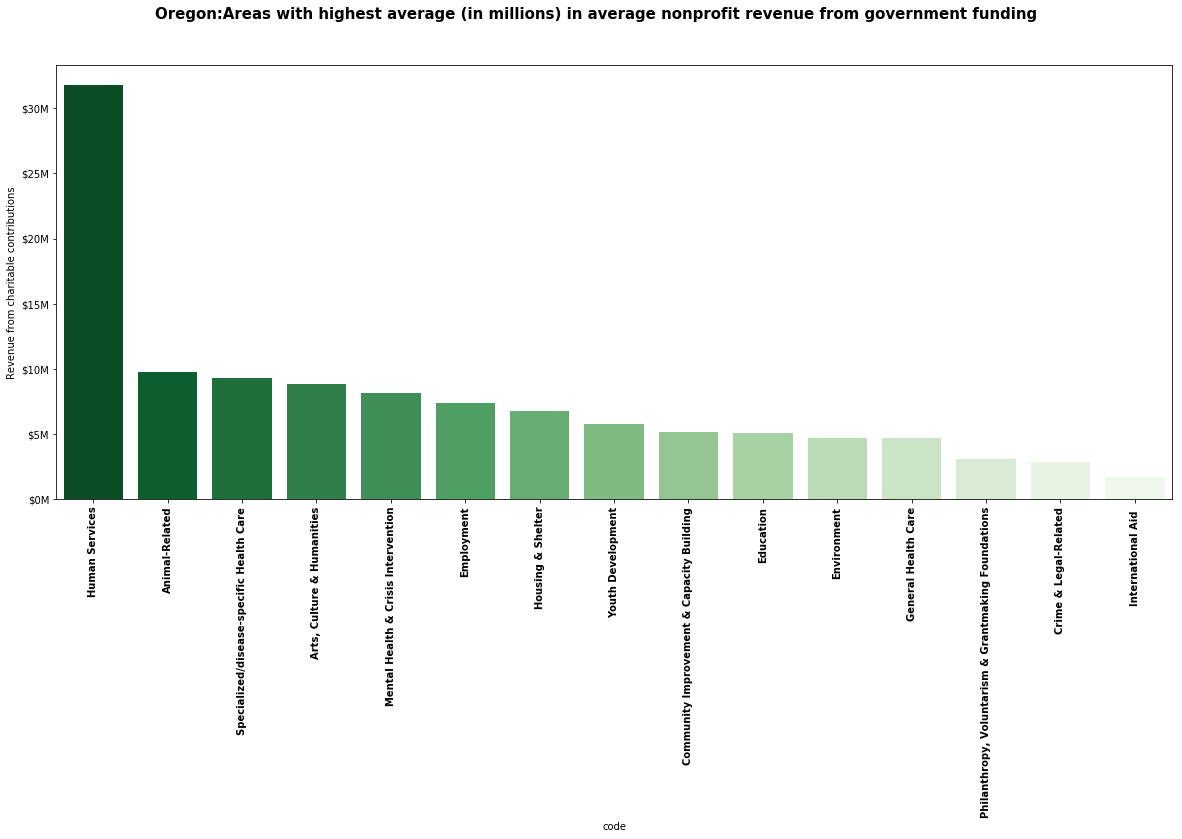

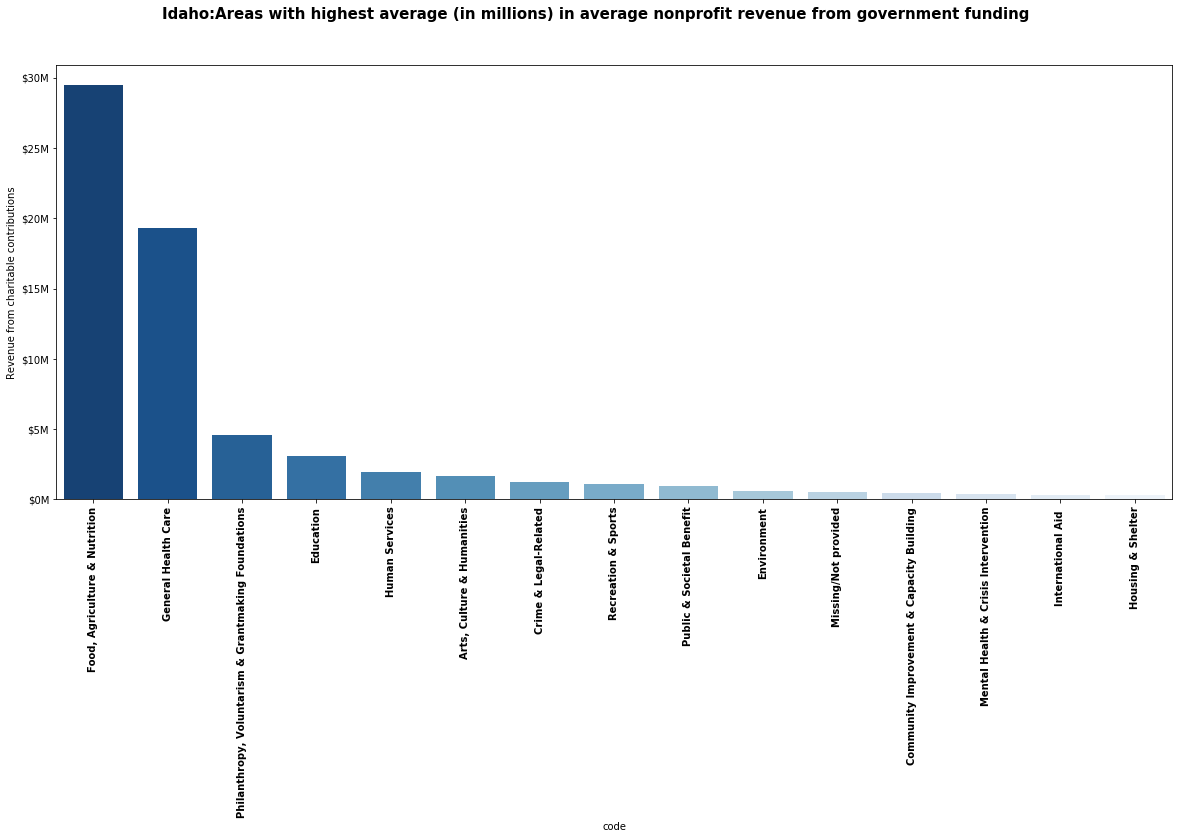

In [49]:
formatter = FuncFormatter(millions)
fig, ax= plt.subplots(figsize=(20, 8))
ax.yaxis.set_major_formatter(formatter)

plt.suptitle('Oregon:Areas with highest average (in millions) in average nonprofit revenue from government funding',\
            fontsize=15, fontweight='bold')
plt.xticks(rotation = 90, fontweight='bold')
sns.barplot(x='code', y='avg', palette='Greens_r', data=highest_funded_areas_or[:15], ax=ax)
plt.ylabel('Revenue from charitable contributions')
formatter = FuncFormatter(millions)
fig, ax= plt.subplots(figsize=(20, 8))
ax.yaxis.set_major_formatter(formatter)

plt.suptitle('Idaho:Areas with highest average (in millions) in average nonprofit revenue from government funding',\
            fontsize=15, fontweight='bold')
plt.xticks(rotation = 90, fontweight='bold')
sns.barplot(x='code', y='avg', palette='Blues_r', data=highest_funded_areas_id[:15], ax=ax)
plt.ylabel('Revenue from charitable contributions')

Text(0.5,0,'Revenue from charitable contributions')

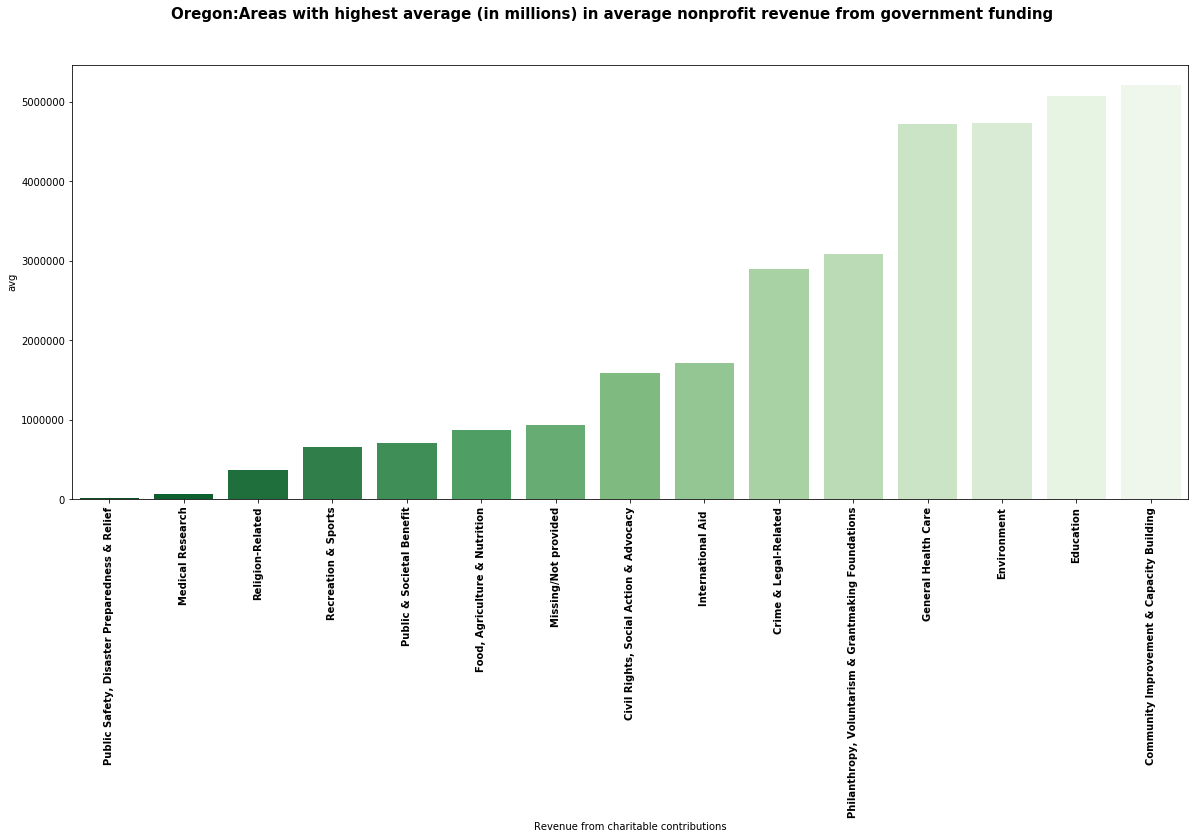

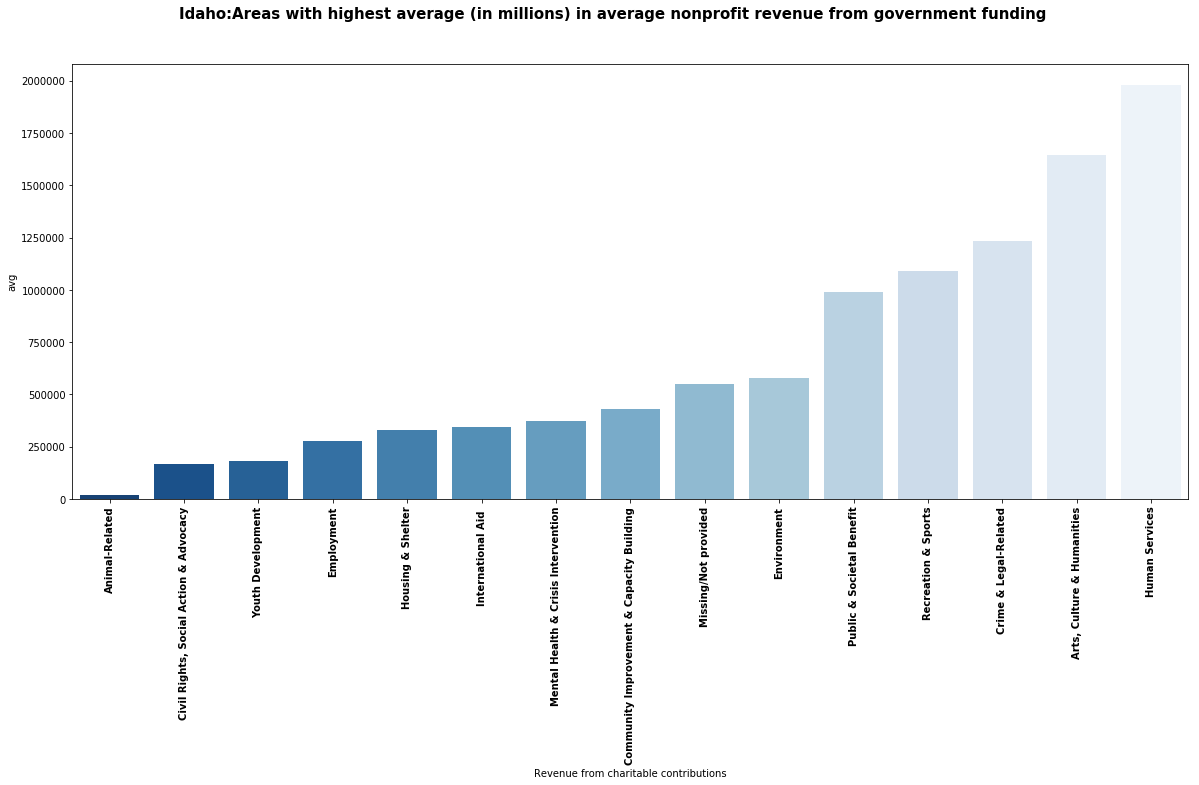

In [50]:
fig, ax= plt.subplots(figsize=(20, 8))

plt.suptitle('Oregon:Areas with highest average (in millions) in average nonprofit revenue from government funding',\
            fontsize=15, fontweight='bold')
plt.xticks(rotation = 90, fontweight='bold')
sns.barplot(x='code', y='avg', palette='Greens_r', data=highest_funded_areas_or.tail(15).sort_values('avg'), ax=ax)
plt.xlabel('Revenue from charitable contributions')

fig, ax= plt.subplots(figsize=(20, 8))

plt.suptitle('Idaho:Areas with highest average (in millions) in average nonprofit revenue from government funding',\
            fontsize=15, fontweight='bold')
plt.xticks(rotation = 90, fontweight='bold')
sns.barplot(x='code', y='avg', palette='Blues_r', data=highest_funded_areas_id.tail(15).sort_values('avg'), ax=ax)
plt.xlabel('Revenue from charitable contributions')

## Non-profits in Oregon vs Idaho:
### 1. Among non-profit receiving significant government funding, Idaho non-profits focusing on food justice and General Health Care recieve by the most funding in direct donations and grants 

### 2. Multipurpose social services  (community centers, long term aging  care, child & youth services etc)  recieve by far the most funding in direct donations and grants  in Oregon.

## Summary / Takeaways
There is an extremely high variance in non profit revenue. Although revenue in a particular state is most frequently reported in the 100,000 to 200,000 dollar range. Reported revenue of tens and hudreds of dollars skew the mean higher higher than the 200,000. Furthermore the mean is likely to be higher in places with a smaller populations as seen with DC and Idaho.

In regards to non-profits in the Pacific Northwest, Alaska is the only state not to increase in nonprofit revenue over the last five years. Idaho's avgerage non-profit revenue not only incresed by the biggest margin but it also reported the highest revenue from contributions by nearly 200,000S. T-test of normalized distributions demonstrate the difference in means (Approx 340,000) between Idaho and Oregon in very significant, with p-value of 2.83435443636889e-20


Among government supported non-profits, General multipurpose non-profits generate the highest donations and grant revenue in Oregon
In Idaho,  Food justice Organizations seems to have the most support generation revenue from contributions and grants

## Further research opportunity
The IRS data flags organizations to recieve significant funding on an annual basis. I would make use of other columns in the filing dataset to build a model to predict if the number of non-profits recieving significant government funding in a particular state will increase or decrease in 2019. Once that model is accurate enough I would attempt to predict the marginal percent change in the number non-profits recieving government funding for 2019